## Classification Models - III

----------------------------------------------------------------
Author: Dr. Sampath Lonka

Date: September 01, 2022

---------------------------------------------------------

References: 
- G. James, D Witten, T Hastie, and R Tibshirani, *An Introduction to Statistical Learning* with Application in R
- Aurelien Geron, Hands-On Machine Learning with Scikit-Learn, Keras and TensorFlow, Second Edition, O'Reilly, 2019

----------------------------------------------------------------

In this tutorial, we discuss **Support Vector Machines** in detail.

- A *Support Vector Machine* (SVM) is a powerful and versatile Machine Learning model, capable of performing linear or non-linear classification, regression, and even outlier detection.
- It is well suited for classification of complex small  or medium sized datasets.
- The SVM is a generalization of a simple and intuitive classifier called the *maximal marginal classifier*.
- SVMs are intended for the binary classification setting.


We discuss the following concepts:
- Maximal Margin Classifier 
- Support Vector Classifier (Soft Margin Classifier)
- Support Vector Machine (SVM)
  - Linear Kernel 
  - Gaussian Kernel
- Relationship to Logistic Regression 




### Maximal Margin Classifier 

**Hyperplane**: In a $k-$ dimensional space, a *hyperplane* is a flat affine subspace of dimension $k-1.$ For instance, in $\mathbb{R}^2,$ any strainght line is hyperplane.  Mathematically, an hyperplane in $\mathbb{R}^k,$ defined as :
$$w_0+w_1X_1+\ldots+w_kX_k=0$$ 

**Data:** Given that $({\bf x}_1, y_1),\ldots, ({\bf x}_n, y_n),$ where ${\bf x}_i =(x_{i1},\ldots,x_{ik}) \in \mathbb{R}^k$ and $y_i\in\{-1,1\}.$ 

Question: We would like to estimate $b,w_1,\ldots,w_k$ such that 

$$b+w_1x_{i1}+\ldots+w_kx_{ik} >0\quad if\quad y_i=1$$ 

$$b+w_1x_{i1}+\ldots+w_kx_{ik}<0\quad if\quad y_i=-1$$
for all $i= 1,\ldots,n.$

Equivalently, 

$$y_i(b+{\bf w}^T {\bf x}_i)>0\quad for\ \ all\quad i= 1,\ldots,n,$$
where ${\bf w}^T=[w_1,\ldots,w_k]$

The equation $b+{\bf w}^T {\bf x}=0$ is called *hyperplane* in $\mathbb{R}^k.$


**Some Observations:**
- If our data can be perfectly seperated using a hyperplane, there will exist an infinite number of such hyperplanes (why?). But we prefer to use only one hyperplane among the infinite choices. 
- A natural choice is the *maximal margin hyperplane*, which is the seperating (classes) hyperplane that is farthest from the training observations.
- A *margin* of the separating hyperplane is defined as the smallest distance from the training observations to the hyperplane. 
- The maximal margin hyperplane is the hyperplane for which the margin is largest - that is, it is the hyperplane that has the farthest minimum distance to the training observations.  
- As the classifier has a large margin on the training data will also have a large margin on the test data, and hence will classify the test observations correctly.
- The model leads to overfitting if $k$ is large. 


#### Construction of the Maximal Margin Classifier 


In this section, we construct the maximal margin hyperplane based on a set of $n$ training observations $({\bf x}_1, y_1),\ldots, ({\bf x}_n, y_n),$ where ${\bf x}_i \in \mathbb{R}^k$ and $y_i\in\{-1,1\}.$ 

The maximal margin hyperplane is the solution to the following optimization problem:

$$argmin_{{\bf w},b} {1\over 2}{\bf w}^T{\bf w}$$

subject to 
$$y_i(b+{\bf w}^T {\bf x}_i)\ge 1\quad \forall\ i= 1,\ldots,n,$$
This is known as the canonical representation of the decision hyperplane.  
If the equality holds for some constraint, it is known as *active constraint*.  There will always at least one active constraint. 

To solve this constrained optimization problem, we use Lagrange Multipliers technique.

Using Lagrange multipliers, the new objective function is defined as

$$min\ {L}({\bf w},b,\lambda)= {1\over 2}{\bf w}^T{\bf w}-\sum_{i=1}^n\lambda_i(y_i(b+{\bf w}^T {\bf x}_i)-1)$$
subject to $\lambda_i\ge0,$ for all $i,$ where $\lambda = (\lambda_1,\ldots, \lambda_n)^T.$

By computing and solving $${\partial {L}\over \partial {\bf w}}=0 \quad and\quad {\partial {L}\over \partial b}=0,$$ we have
$${\bf w} = \sum_{i=1}^n\lambda_iy_i{\bf x}_i \quad and \quad \sum_{i=1}^n\lambda_iy_i = 0.$$

By substituting these values in above Langrage function, we have the following dual problem and maximize it w.r.t $\lambda_i.$

$$Maximum\tilde{L}(\lambda)= \sum_{i=1}^n \lambda_i -{1\over 2} \sum_{i=1}^n\sum_{j=1}^n\lambda_i\lambda_jy_iy_j{\bf x}_i^T{\bf x}_j$$
subject to 
$$\sum_{i=1}^n \lambda_iy_i=0$$

$$\lambda_i\ge0\quad \forall\ i.$$

**Karush-Kuhn-Tucker (KKT) Conditions**: 

The KKT conditions for the optimization problem $L({\bf w},b,\lambda)$ is given below:

$$\lambda_n\ge 0.$$

$$y_n(b+{\bf w}^T {\bf x}_n)-1\ge0.$$

$$\lambda_n(y_n(b+{\bf w}^T {\bf x}_n)-1)=0.$$

*Some observations*:

- For every data point, either $\lambda_n=0$ or $y_n(b+{\bf w}^T {\bf x}_n)=1.$
- For any data point, $\lambda_n=0,$ the respective constrain is no role in the prediction for new data points.
- The remaining data points i.e., the points for which $y_n(b+{\bf w}^T {\bf x}_n)=1,$ are called *support vectors*. 
- The support vectors are lie on the maximum margin hyperplane in the feature space. This property is key to the practical applicability of SVM.  

#### Making predictions


- *Computation of ${\bf w}:$* Given a set of optimal $\lambda_i,$ we can compute optimal parameter ${\bf w}$ as follows:
$${\bf w} = \sum_{i=1}^n\lambda_iy_i{\bf x}^T_i$$

- *Computation of $b:$* The threshold parameter $b$ can be computed by using all support vectors:

$$b = {1\over N_{\mathcal{S}}}\sum_{x_i\in S}\Big(y_i-\sum_{x_j\in S}\lambda_jy_j{\bf x}^T_j{\bf x}_i\Big)$$

- *Prediction of test data:* We use above values for ${\bf w}$ and $b$ to compute the associated label for the new observation ${\bf x}_{new}$ by using below formula.


$$y = sign({\bf w}^T{\bf x}_{new}+b)$$


##### Implementation of Maximal Margin Classifier

We have the following steps in the implementation:

- Basic setup and initialization of the weights and biases
- Map the class labels from {0, 1} to {-1, 1}
- Perform gradient descent for $n$ iterations, which involves the computation of the gradients and updating the weights and biases accordingly.
- Make the final prediction

##### The loss function for SVM:

$$\mathcal{L}({\bf w},b) = {\lambda\over 2} \|{\bf w}\|^2+ {1\over n}\sum_{i=1}^n max(0,1-y_i({\bf w}^Tx_i+b))$$

Use subgradient technique to compute the gradients.

Exercise: Compute ${\partial \mathcal{L}\over \partial {\bf w}},{\partial \mathcal{L}\over \partial b}$

Note: If $y_i({\bf w}^Tx_i+b)\ge1,$ then $\mathcal{L}({\bf w},b) = {\lambda\over 2} \|{\bf w}\|^2$ otherwise .

In [6]:
import numpy as np

In [7]:
# define maximal margin classifier 
def max_margin_classifier(X,y,lr=1e-3,lambda_praram=1e-2,n_iters=1000):
    n,m = X.shape
    #initialization
    w = np.random.random((m,1))
    #print(w.shape)
    b = np.random.random(1)
    
    # map {0,1} to {-1,1}
    def cls_map(y):
        return np.where(y <= 0, -1, 1)
    
    def satisfy_constrain(x,idx):
        linear_model = np.dot(x,w) + b
        return cls_map(y)[idx]*linear_model >= 1

    # gadient of the loss function
    def get_gradient(constrain,x,idx): 
        if constrain:
            dw = lambda_praram* w
            db = 0
            return dw, db 
        dw = lambda_praram*w - cls_map(y)[idx]*x.reshape(-1,1)
        db = - cls_map(y)[idx] 
        return dw, db 

    #train the algorithm
    for i in range(n_iters):
        for idx, x in enumerate(X): 
            constraint = satisfy_constrain(x,idx)
            dw, db = get_gradient(constraint,x,idx)
            #ipdate rule
            w -= lr*dw 
            b -= lr*db
        return w, b 
        

In [8]:
#prediction
def predict(X,w_hat,b_hat):
    estimate = np.dot(X,w_hat)+b_hat
    #compute the sign 
    prediction = np.sign(estimate) 
    return np.where(prediction == -1, 0, 1)

In [9]:
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

In [10]:
X, y = make_blobs(n_samples=250, n_features=2,
                  centers=2, cluster_std=1.05, 
                  random_state=1)
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.1, shuffle=True, random_state=1)

In [11]:
w = max_margin_classifier(X_train, y_train)
print(w)

(array([[-0.05958688],
       [-0.03345153]]), array([0.86708854]))


In [13]:
predictions = predict(X_test, w[0], w[1]).ravel()

In [14]:
def accuracy(y_true, y_pred):
    accuracy = np.sum(y_true==y_pred) / len(y_true)
    return accuracy

print("SVM Accuracy: ", accuracy(y_test, predictions))

SVM Accuracy:  0.52


In [13]:
# plot results
def get_hyperplane(x, w, b, offset):
    return (-w[0] * x - b + offset) / w[1]

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

Reference for below code is [Marvin](https://towardsdatascience.com/implementing-svm-from-scratch-784e4ad0bc6a) medium article.

SVM Accuracy:  1.0


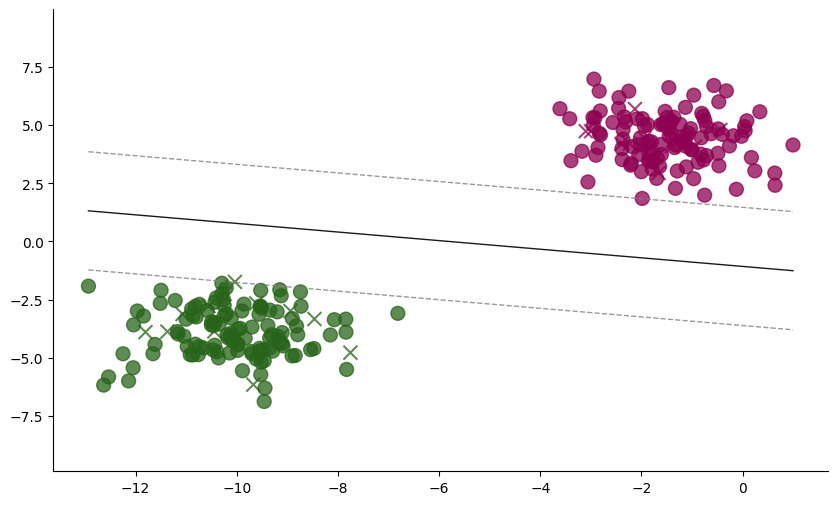

In [18]:
import numpy as np
from SVM import SVM
from sklearn import datasets
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Testing
if __name__ == "__main__":
    X, y = datasets.make_blobs(
        n_samples=250, n_features=2, centers=2, cluster_std=1.05, random_state=1
    )

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, shuffle=True, random_state=1)

    clf = SVM(n_iters=1000)
    clf.fit(X_train, y_train)
    predictions = clf.predict(X_test)

    def accuracy(y_true, y_pred):
        accuracy = np.sum(y_true==y_pred) / len(y_true)
        return accuracy

    print("SVM Accuracy: ", accuracy(y_test, predictions))

    # plot results
    def get_hyperplane(x, w, b, offset):
        return (-w[0] * x - b + offset) / w[1]

    fig, ax = plt.subplots(1, 1, figsize=(10,6))

    plt.set_cmap('PiYG')
    plt.scatter(X_train[:, 0], X_train[:, 1], marker='o', c=y_train, s=100, alpha=0.75)
    plt.scatter(X_test[:, 0], X_test[:, 1], marker="x", c=y_test, s=100, alpha=0.75)

    x0_1 = np.amin(X_train[:, 0])
    x0_2 = np.amax(X_train[:, 0])

    x1_1 = get_hyperplane(x0_1, clf.w, clf.b, 0)
    x1_2 = get_hyperplane(x0_2, clf.w, clf.b, 0)

    x1_1_m = get_hyperplane(x0_1, clf.w, clf.b, -1)
    x1_2_m = get_hyperplane(x0_2, clf.w, clf.b, -1)

    x1_1_p = get_hyperplane(x0_1, clf.w, clf.b, 1)
    x1_2_p = get_hyperplane(x0_2, clf.w, clf.b, 1)

    ax.plot([x0_1, x0_2], [x1_1, x1_2], "-", c='k', lw=1, alpha=0.9)
    ax.plot([x0_1, x0_2], [x1_1_m, x1_2_m], "--", c='grey', lw=1, alpha=0.8)
    ax.plot([x0_1, x0_2], [x1_1_p, x1_2_p], "--", c='grey', lw=1, alpha=0.8)

    x1_min = np.amin(X[:, 1])
    x1_max = np.amax(X[:, 1])
    ax.set_ylim([x1_min - 3, x1_max + 3])

    for spine in ['top','right']:
        ax.spines[spine].set_visible(False)

    plt.show()

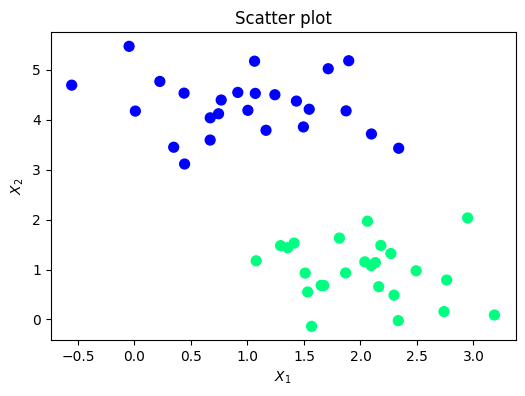

In [24]:
#Generate synthetic classes
from sklearn.datasets._samples_generator import make_blobs

X, y = make_blobs(n_samples=50, centers=2, random_state=0,cluster_std=0.60)
plt.figure(figsize=(6,4))
plt.scatter(X[:,0],X[:,1],c=y,s=50,cmap='winter')
plt.title('Scatter plot')
plt.xlabel('$X_1$')
plt.ylabel('$X_2$')
plt.show()

#### Modeling SVM using *sklearn*

In [30]:
from sklearn.datasets._samples_generator import make_circles
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import numpy as np  


In [25]:
model = SVC(kernel='linear',C=1E5)
model.fit(X,y)

SVC(C=100000.0, kernel='linear')

In [31]:
#SVM decision boundary
def plot_svc_decision_fn(model, ax=None, plot_support=True):
    """_summary_
    Plot the decision boundary for a two-dimensional SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim() 
    
    # create grid to evaluate model
    x = np.linspace(xlim[0],xlim[1],30)  
    y = np.linspace(ylim[0],ylim[1],30)
    Y, X = np.meshgrid(y,x)    
    xy = np.vstack([X.ravel(), Y.ravel()]).T 
    p = model.decision_function(xy).reshape(X.shape)
    
    #plot the decision function and margins 
    ax.contour(X,Y,p,colors='k',
               levels=[-1,0,1], alpha=0.5,
               linestyles=['--','-','--'])
    #plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:,0],
                   model.support_vectors_[:,1],
                   s=100, linewidth=1, edgecolor='k', facecolor='none');
    ax.set_xlim(xlim) 
    ax.set_ylim(ylim) 

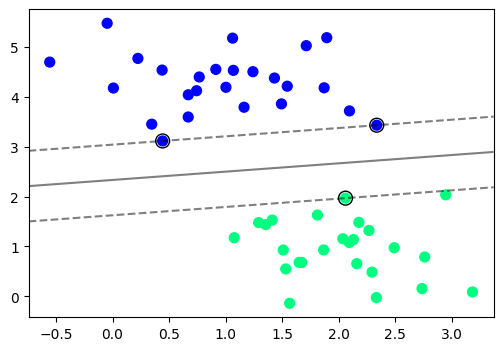

In [35]:
plt.figure(figsize=(6,4))
plt.scatter(X[:,0],X[:,1], c=y,s=50,cmap='winter')
plot_svc_decision_fn(model)

In [36]:
model.support_vectors_

array([[0.44359863, 3.11530945],
       [2.33812285, 3.43116792],
       [2.06156753, 1.96918596]])

In [37]:
#plot svm

def plot_svm(N=10, ax=None):
    X, y = make_blobs(n_samples=200, centers=2,
                      random_state=0, cluster_std=0.60)
    X = X[:N]
    y = y[:N] 
    #modeling
    model = SVC(kernel="linear",C=1E5) 
    model.fit(X,y) 
    
    
    #ploting
    #gca() used to get the current Axes instance on the current figure matching
    # the given keyword args, or create one. 
    ax = ax or plt.gca()
    ax.scatter(X[:,0],X[:,1], c=y, s=50, cmap="winter")
    ax.set_xlim(-1,4)
    ax.set_ylim(-1,6)
    
    plot_svc_decision_fn(model,ax)
    

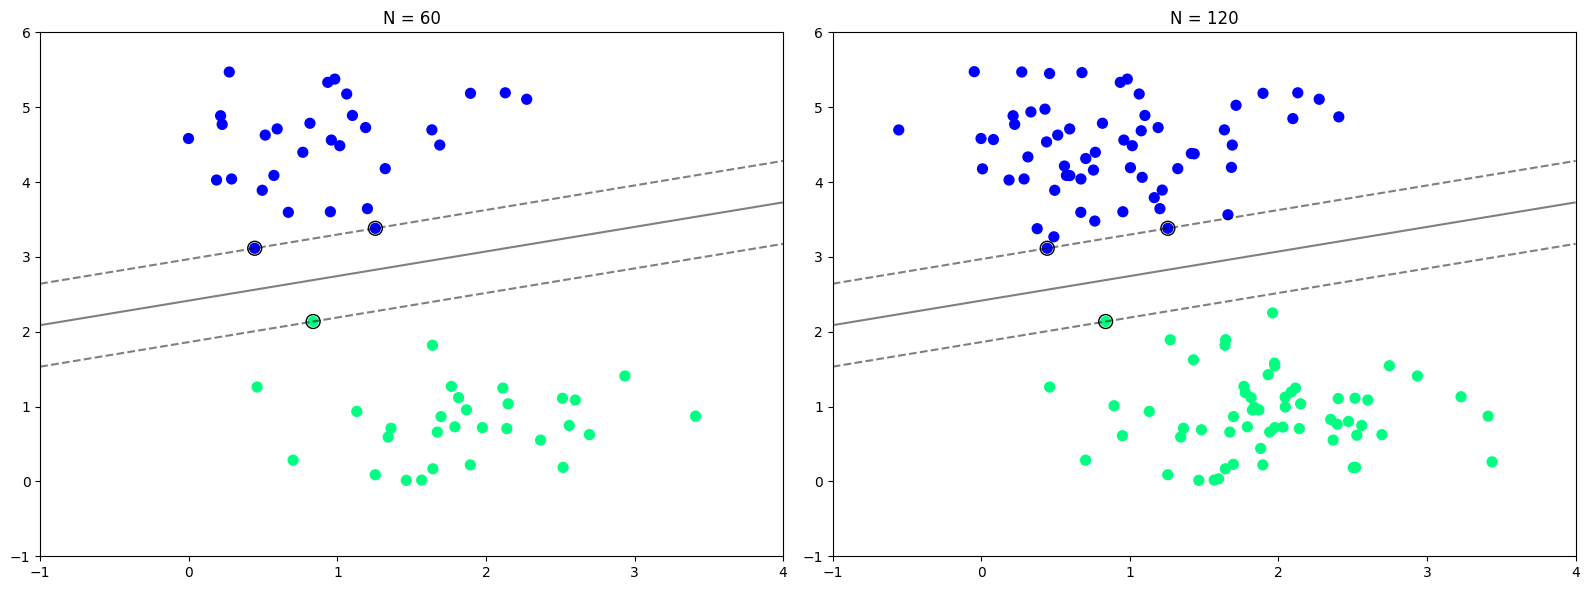

In [39]:
fig, ax = plt.subplots(1,2, figsize=(16,6)) 
for axi, N in zip(ax, [60,120]):
    plot_svm(N,axi) 
    axi.set_title(f"N = {N}") 
plt.tight_layout()

In [51]:
from ipywidgets import interact, fixed 
interact(plot_svm, N=np.arange(10,201,10), ax=fixed(None))

interactive(children=(Dropdown(description='N', options=(10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 13…

<function __main__.plot_svm(N=10, ax=None)>

### Support Vector Classifier 


- Maximal margin hyperplane is perform very well if the training onservations are linear separable in the feature space. 
- If the class-conditional distributions overlap, the maximal margin hyperplane can lead to poor generalization.
- It's sensitive to individual observations. Thus, we are interested to find classifer based on a hyperplane that does not perfectly separate the two classes, in the interest of
   - greater robustness to individual observations, and 
   - better classification of most of the training observations
- We are interested to develop a classifier which misclassify a few training observations in order to do a better job in classifying the remaining observations.
- In the marginal maximal hyperplane optimization, we modify the constraints so that the data points are allowed to be on the *wrong side* of the margin boundary, but with a penalty that increases with the distance from that boundary.
- To do this, we introduce *slack variables, $\xi_n\ge0$* for all $n,$ with one slack for each training data point. 
- For the data points that are on or inside the correct margin boundary we define $\xi_n=0,$ otherwise, $\xi_n=|y_n-(b+{\bf w^T}{\bf x}_n)|.$ Thus a data point that is on the decision boundary $b+{\bf w^T}{\bf x}_n)=0$ will have $\xi_n=1,$ and points with $\xi_n>1$ will be misclassified.
- Hence the constarints $y_n(b+{\bf w^T}{\bf x}_n)\ge 1$ are replaced with  
  $$y_i(b+{\bf w^T}{\bf x}_i)\ge 1-\xi_i,\quad i=1,\ldots,n$$ 
  with the slack variables satisfy $\xi_i\ge 0.$
- We have the following observations:
  - For the data points either on the margin or on the correct side of the margin, $\xi_i=0$
  - For the data points inside the margin but correct side of the decision boundary, $0<\xi\le 1.$
  - For the data points, wrong side of the decision boundary and misclassified, $\xi>1.$ 
- Our goal to maximize the margin while softly penalizing points that lie on the wrong side of the margin boundary.
- Thus our optimization problem is defined as follows:
$$ argmin_{{\bf w},b} {1\over 2} \|{\bf w}\|^2 +C\sum_{i=1}^n\xi_i $$
subject to 
$$\xi_i\ge 0$$
and 
$$y_i(b+{\bf w^T}{\bf x}_i)\ge 1-\xi_i\quad \forall i$$ 
- The Lagrangian function defined as 
$$L({\bf w},b,{\bf \xi},\lambda,\mu) = {1\over 2}\|{\bf w}\|^2+C\sum_{i=1}^n\xi_i-\sum_{i=1}^n\lambda_i(y_i(b+{\bf w^T}{\bf x}_i)-1+\xi_i)-\sum_{i=1}^n\mu_i\xi_i$$
where $\lambda_j\ge0$ and $\mu_j\ge0$ are Lagrange multipliers.
- Calculations of ${\bf w},\ b\ \text{and}\ \{\xi_i\}:$
  $${\partial L \over \partial {\bf w}} = 0 \Rightarrow {\bf w} = \sum_{i=1}^n\lambda_i(y_i(b+{\bf w^T}{\bf x}_i))$$ 
  $$ {\partial L \over \partial b}=0 \Rightarrow \sum_{i=1}^n\lambda_iy_i=0$$
  $$ {\partial L \over \partial \xi_i}=0\Rightarrow \lambda_i = C-\mu_i$$
- Using above equations, eliminate ${\bf w},\ b$ and $\{\xi_i\}$ from the Lagrangian, we obtain the dual Lagrangian as follows:
  $$Maximize \tilde{L}(\lambda) = \sum_{i=1}^n\lambda_i-{1\over 2}\sum_{i=1}^n\sum_{j=1}^n\lambda_i\lambda_jy_iy_j{\bf x}_i^T{\bf x}_j$$
subject to $$\sum_{i=1}^n\lambda_iy_i=0$$ and $$0\le \lambda_i\le C$$ (this is because $\mu_i\ge0$). The last constraint is known as *box constraint*.



 

#### KKT Conditions for optimization of $L:$

The KKT conditions are given as :
- $\lambda_i\ge0$
- $y_i(b+{\bf w}^T{\bf x}_i)-1+\xi_i\ge0$ 
- $\lambda_i(y_i(b+{\bf w}^T{\bf x}_i)-1+\xi_i)=0$
- $\mu_i\ge0$ 
- $\xi_i\ge0$ 
- $\mu_i\xi_i=0$ where $i=1,\ldots,n.$ 

#### Some observations:
we have the following interpretations:

- For the data points for which $\lambda_i=0,$ they do not contribute to model. 
- The remaining observations are support vectors, for which $\lambda_i>0$ and $y_i(b+{\bf w}^T{\bf x}_i)=1-\xi_i.$
- If $0<\lambda_i<C,$ then $\mu_i>0,$ which implies that $\xi_i=0$ and hence the respective points lie on the margin.
- Points with $\lambda_i=C$ can lie inside the margin and can be either be correctly classified if $\xi_i\le 1$ or misclassified if $\xi_i>1.$

#### Estimation of ${\bf w}$ and $b:$

After findind optimal $\lambda,$ we can calculate the required parameters:
- The parameters ${\bf w}$ is given below:
  $${\bf w} = \sum_{i=1}^n\lambda_iy_i{\bf x}_i$$
- We use all the support vectors to determine $b$ and it is given as below:
  $$b = {1\over N_{\mathcal{M}}}\sum_{i\in N_{\mathcal{M}}}\Big(y_i-\sum_{j\in \mathcal{S}}\lambda_jy_j{\bf x}_j^T{\bf x}_i\Big)$$
where $\mathcal{M}$ denotes the set of indices of data points having $0<\lambda_i<C.$


### Beyond Linearity: Kernel SVM 

- In *Support Vector Classifier,* the soft margin allows training points to reside on the wrong side of the decision boundary but it will not help in some complex datasets.
- When we want non-linear decision boundary, we increase the feature space $x$ and extend ${\bf w}.$ 
-  The model remains same (a linear decision boundary) but for data that has been transformed into some new space. The transformation is done in such a way as to make the transformed data classifiable with a linear decision boundary.
-  To archive it, we introduce the class of functions known as **kernel** functions
-  The functions corresponding to inner products in some space are known as *kernel* functions
-  Some example of kernels: For ${\bf x}_n,{\bf x}_m\in\mathbb{R}^k$
-  Linear kernel $k(x_n,x_m)=x_n^Tx_m$
-  


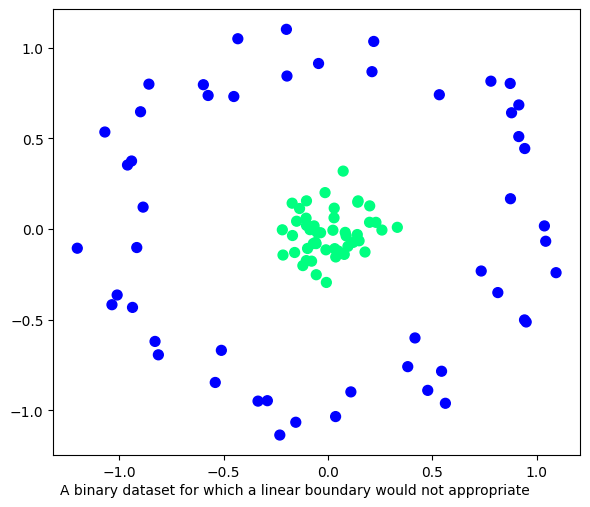

In [47]:
X, y = make_circles(100, factor=0.1, noise=0.1) 
clf = SVC(kernel="linear").fit(X,y)  
fig = plt.figure(figsize=(6,5))
plt.scatter(X[:,0],X[:,1], c=y, s=50, cmap='winter') 
fig.text(.5, .0001, "A binary dataset for which a linear boundary would not appropriate",
         ha='center')
plt.tight_layout()
plt.savefig('Beyond_linear.png')
plt.show()
#plot_svc_decision_fn(clf,plot_support=False)

In [21]:
from mpl_toolkits import mplot3d 

In [22]:
#radial basis function
r = np.exp(-(X**2).sum(1))

In [48]:
def plot_3D(elev=30, azim=30, X=X, y=y):
    ax = plt.subplot(projection='3d')
    ax.scatter3D(X[:,0],X[:,1],r, c=y, s=50,cmap='winter')
    ax.view_init(elev=elev, azim=azim)
    ax.set_xlabel('x') 
    ax.set_ylabel('y')
    ax.set_zlabel('r')
    plt.show()

In [49]:
from ipywidgets import interact, fixed 

In [50]:
interact(plot_3D,azip=(-180,180), X=fixed(X),y=fixed(y))

interactive(children=(IntSlider(value=30, description='elev', max=90, min=-30), IntSlider(value=30, descriptio…

<function __main__.plot_3D(elev=30, azim=30, X=array([[-0.10329825,  0.01975764],
       [ 1.04317051, -0.0676528 ],
       [-0.94168092,  0.37453082],
       [ 0.03618127, -1.03385797],
       [-1.0106612 , -0.36395092],
       [-0.03575794, -0.02069257],
       [-1.20175591, -0.10606646],
       [ 0.12031073, -0.07392129],
       [ 0.10942978, -0.89786659],
       [-0.07587396,  0.0115908 ],
       [-0.13651784,  0.11284375],
       [-0.01429432,  0.20032764],
       [-0.17202093,  0.14211194],
       [ 0.19968287,  0.12729073],
       [ 0.02957771,  0.11467518],
       [ 0.94273507,  0.44333106],
       [-0.07889204, -0.17739004],
       [-0.15065859,  0.04267711],
       [-0.12071563, -0.20178752],
       [ 0.47785432, -0.88945446],
       [-0.57470801,  0.73570522],
       [-0.16006988, -0.12964066],
       [ 0.5624425 , -0.96063998],
       [ 0.87952254,  0.64040761],
       [-0.4515329 ,  0.72997973],
       [ 0.91436165,  0.68354326],
       [-0.0454581 ,  0.91191114],
       [

In [53]:
clf = SVC(kernel='rbf',C=1E6)
clf.fit(X,y)   


SVC(C=1000000.0)

In [60]:
p = clf.get_params()

In [61]:
p

{'C': 1000000.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

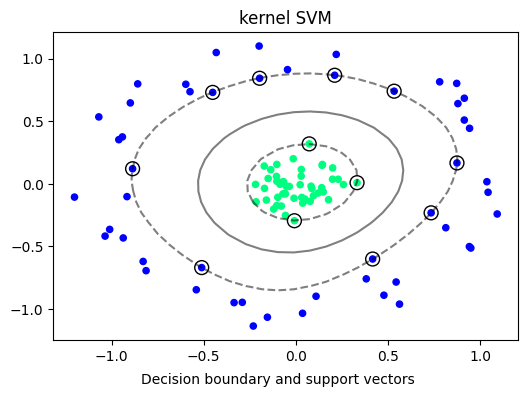

In [57]:
fig = plt.figure(figsize=(6,4))
plt.scatter(X[:,0],X[:,1],c=y,s=20,cmap='winter')
plot_svc_decision_fn(clf)
fig.text(.5, .0001, "Decision boundary and support vectors",
         ha='center')
plt.title('kernel SVM')
plt.savefig('kernel_SVM.png')
plt.show()